# Descriptive Data Analysis with Pandas


The codebase contains several functions to perform the required tasks. The function 'data_frame' takes series, column names, and ordered categories of ordinal variables as input and returns a data frame sorted based on the ordinal variable categories. The column names are given a suffix at the end to distinguish their types.

Other functions such as 'basic_description', 'central_tendency', and 'spread_descriptions' take the data frame as input and return the required report as a tidy and readable data frame.

The 'visualizing_nTOnplot' function takes the data frame as input and generates subplots. It creates n*n plots based on all features vs. each other, where n is the number of features in the data frame

To test the function, several examples of data are manually generated and included in the notebook. These examples cover a range of data types, including nominal, ordinal, interval, and ratio, and demonstrate the performance of the simpleDDA() function on different types of data.

In [79]:
#import some libraries
import pandas as pd
import numpy as np
import itertools
import functools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

### Define a Function for creating data frame:

In [80]:
#series_list : is a list of series
#cols_name= [the variables name]
#list of categories of ordinary list
def data_frame(series_list, cols_name, categories):
  
    # get the list of series [[column1],[column2], ...] 
    #and convert it to a list of rows [[row1], [row2], ...]
    list_of_rows = [[serie[i] for serie in series_list] for i in range (len(series_list[1]))]
     
    #creating data frme
    df = pd.DataFrame(list_of_rows, index=None, columns = cols_name) 
    
    # finding ordinal variable based on sufix of columns name
    ordinal_col=[x for x in df.columns if x.endswith('ordinal')]
    
    # sort dataframe based on sorted ordinatry column
    # if there is more than one ordinal variable, the last feature's order has the sorted priority. 
    # Categories with None values will be sorted alphabetically.
    for cat,col in zip(categories, ordinal_col):
        df[col] = pd.Categorical(df[col],categories= cat ,ordered=True)
        df = df.sort_values(col)
  
    return df

### (A) Overall Descriptions

In [81]:
def basic_discribtion(df):
    row,column = df.shape
    #add number of null poit for each feature to a list
    df_cols_null = [x for x in df.isnull().sum()]
    #add number of unique poit for each feature to a list
    df_cols_unique = [df[i].unique().size for i in df.columns]
    rowlist = [row for i in range(len(df.columns))]
    columnlist = [column for i in range(len(df.columns))]
     ## adding all info to a dataframe to show the report more tidy
    data = [rowlist, columnlist, df_cols_null, df_cols_unique]
    
    #create dataframe based on estimated lists
    dfB = pd.DataFrame(data, index=['observation','entery','null_enteries', 'unique_entreies'], columns=df.columns)
    print('\n\nA: ')
    #display the dataframe
    display(dfB)


### (B.1) Central Tendency Descriptions

In [82]:
def central_tendency(df):
    
    #calculating all feature mode
    mode_total = [df[col].mode()[0] for col in df.columns]
    
    #finding name of columns and their tyype based on their sufix 
    #for example, nominal_col is a list that containing nominal column name_nominal
    nominal_col, ordinal_col, interval_col, ratio_col=[x for x in df.columns if x.endswith('nominal')],[x for x in df.columns if x.endswith('ordinal')],[x for x in df.columns if x.endswith('interval')],[x for x in df.columns if x.endswith('ratio')]
    
    nominal_unique_count= [df[col].unique().size if col in nominal_col else None for col in df.columns]
    
    ####replacing ordinal categories to an integer number 
    # based on the order that is already defined in categories list
    # if that feature is string and has defined order
    for col in ordinal_col:
            if type(df[col][0])==str :
                #since the ordinal value is already sorted, then by extracting its unique value,
                #its order will be reached
                cat=list(df.col_ordinal.unique())
                df[col].replace(cat, np.arange(1,len(cat)+1), inplace=True)
    
    #for calculating mode, ordinal columns must be in numeric format, so first eliminate the string variables
    # there is a possibility that a String feature doesn't have order to replace with integer and remain String
    ordinal_numeric = [col  for col in ordinal_col if type(df[col][0])!= str]

    
    #Calculate the median of the interval and ratio series and the numeric variables in ordinal columns
    #otherwise the median is None
    median_total = [df[col].median() if col in ordinal_numeric+interval_col+ratio_col else None
                          for col in df.columns]

    #for calculating the mean of the interval and ratio series 
    #otherwise the mean is None
    mean_total = [ df[col].mean() if col in interval_col+ratio_col else None for col in df.columns]
    
    ## adding all Central Tendency to a dataframe to show the report more tidy
    data = [mode_total, median_total, mean_total]
    dfB = pd.DataFrame(data, index=['mode','median','mean'], columns=df.columns)
    
    print('\n\nB1: ')
    display(dfB)

## (B.2) Spread Descriptions

In [83]:
#defining a function to return dataframe based oncenteral tendency(mean,median,min,max,IQR,std)
# the input datafram must icludes numerical ordinal datartype
def spread_descriptions(df):
    #finding name of columns and their tyype based on their sufix 
    #for example, nominal_col is a list that containing nominal column name_nominal
    nominal_col, ordinal_col, interval_col, ratio_col=[x for x in df.columns if x.endswith('nominal')],[x for x in df.columns if x.endswith('ordinal')],[x for x in df.columns if x.endswith('interval')],[x for x in df.columns if x.endswith('ratio')]
    
    nominal_unique_count= [df[col].unique().size if col in nominal_col else None for col in df.columns]
    
    ####replacing ordinal categories to an integer number 
    # based on the order that is already defined in categories list
    # if that feature is string and has defined order
    for col in ordinal_col:
            if type(df[col][0])==str :
                #since the ordinal value is already sorted, then by extracting its unique value,
                #its order will be reached
                cat=list(df.col_ordinal.unique())
                df[col].replace(cat, np.arange(1,len(cat)+1), inplace=True)
    
    #range: min & max  for ordinal, interval, ratio data types
    # interval_col &ratio_col are containing interval & nominal columns name
    min_of_cols = [ df[col].min() if col in ordinal_col+interval_col + ratio_col else None for col in df.columns]
    max_of_cols = [ df[col].max() if col in ordinal_col+interval_col + ratio_col else None for col in df.columns]

    # interval_col &ratio_col are containing interval & nominal columns name
    # defining a function to calculate IQR of each column
    def IQR(df, col):
        Q3,Q1 = np.quantile(df[col], 0.75),np.quantile(df[col], 0.25)
        #IQR: Q3-Q1, for interval, ratio data types
        IQR = Q3 - Q1
        return IQR
    
    #apply function IQR on all ratio and interval columns and insert None for the rest columns
    IQR =[IQR(df,col) if col in interval_col + ratio_col else None for col in df.columns]
    std =[df[col].std() if col in interval_col + ratio_col else None for col in df.columns]
    
    # adding all Central Tendency to a dataframe to show the report more tidy
    data =[nominal_unique_count, min_of_cols, max_of_cols, IQR, std]
    describe = pd.DataFrame(data, index=['Unique', 'Min','Max','IQR','Std'],columns =df.columns)
    
    print('\n\nB2: ')
    display(describe)

### (C) Visual Descriptions

In [113]:
#this function is for dataframe with more than n variables 
#and if n is the number of features, it gives n*n plots based on all features vs. each other 
#histogram for categorical vs. categorial variable
#ascatter for continuous vs. continuous variable
#plot box for categoricl vs. continuous variable 
#histogram for a unique variable 
def visualizing_nTOnplot(df):
    print('\n\nC: ')
    fig= plt.figure(figsize=(25,25))
    
    x,n=df.shape
    # n is the number of featers/columns
    axs=[fig.add_subplot(n,n,i) for i in range(1,n*n+1)]


    #initialize k as number of subplot 
    k=0 
    
    # first, put x=(ith column )and check its type by extracting its suffix
    #then put y=(jth column) and check its type
    # based on the x and y type the appropriate plotting is choosen
    # each time j changes  k increased by one, the new plot will be applied in a new subplot
    for i in df.columns:
        for j in df.columns:
        
            if i.endswith('nominal') and j.endswith('nominal'):
                if j==i:
                    sns.histplot(ax = axs[k], data=df, x=i,color ='black', shrink=.7)
                    
                else:
                    sns.barplot(ax = axs[k], data=df, x=i, y=j)
            if i.endswith('nominal') and j.endswith('ordinal'):
                sns.histplot(ax = axs[k], data=df, x=i, hue=j,multiple="dodge",  color ='black', shrink=.3)
            if i.endswith('nominal') and j.endswith('interval'): 
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('nominal') and j.endswith('ratio'):
                sns.boxplot(ax = axs[k], x = df[i], y=df[j])
            
            
            if i.endswith('ordinal') and j.endswith('ordinal'):
                if j==i:
                    sns.histplot(ax=axs[k], data = df, x= i , color ='black', shrink=.7)
                else:
                    sns.histplot(ax = axs[k], data=df, x=i, hue=j)
                
            if i.endswith('ordinal') and j.endswith('nominal'):
                sns.histplot(ax = axs[k], data=df, x=i, hue=j, shrink=.5, multiple="dodge")
            if i.endswith('ordinal') and j.endswith('interval'): 
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('ordinal') and j.endswith('ratio'):
                sns.boxplot(ax = axs[k], x = df[i], y=df[j])
        
        
            if i.endswith('interval') and j.endswith('interval'):
                if j==i:
                    sns.histplot(ax=axs[k], data = df, x= i , color ='black', shrink=.7)
                else:
                    sns.scatterplot(ax = axs[k], data=df, x=i, hue=j) 
                
            if i.endswith('interval') and j.endswith('nominal'):
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('interval') and j.endswith('ordinal'): 
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('interval') and j.endswith('ratio'):
                sns.scatterplot(ax = axs[k], x = df[i], y=df[j])
                
            if i.endswith('ratio') and j.endswith('ratio'):
                if j==i:
                    sns.histplot(ax=axs[k], data = df, x= i , color ='black', shrink=.7)
                else:
                    sns.scatterplot(ax = axs[k], data=df, x=i, hue=j) 
                
            if i.endswith('ratio') and j.endswith('nominal'):
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('ratio') and j.endswith('ordinal'): 
                sns.boxplot( ax = axs[k], x = df[i], y=df[j] )
            if i.endswith('ratio') and j.endswith('interval'):
                sns.scatterplot(ax = axs[k], x = df[i], y=df[j])
                
        
            #add one to number of subplot
            k=k+1 

## SimpleDDA

In [114]:
#cols_typeAnDname is a list of columns names list baset on columns data type
#list of categories of ordinary list
def simpleDDA(df):
    
    display(df)
    
    #part A
    basic_discribtion(df)
    
    #part B
    central_tendency(df)
    
    #part B2
    spread_descriptions(df)
    
    #C
    visualizing_nTOnplot(df)

### Example 1:

In [115]:
col1_nominal = ['M','F','F','F','F','M','F','F','F',None,'M']
col2_ordinal = ['best','bad','not good','best','good','best','not good','best','bad','good','best']
col3_interval = [-8,-3, -6,-6,8,2,-1,2,5,2,-3]
col4_ratio = [4, 0, 8, 19, 2, 7.5,0,3,20,8,9]

series_list=[col1_nominal,col2_ordinal,col3_interval,col4_ratio]

#order od ordinal variables
categories=[['best','good','not good','bad']]

#calling dataframe function that return sorted dataframe
df1 = data_frame(series_list, ['col_nominal','col_ordinal','col_interval','col_ratio'],categories)


,col_nominal,col_ordinal,col_interval,col_ratio
0,M,best,-8,4.0
3,F,best,-6,19.0
5,M,best,2,7.5
7,F,best,2,3.0
10,M,best,-3,9.0
4,F,good,8,2.0
9,None,good,2,8.0
2,F,not good,-6,8.0
6,F,not good,-1,0.0
1,F,bad,-3,0.0




A: 


,col_nominal,col_ordinal,col_interval,col_ratio
observation,11,11,11,11
entery,4,4,4,4
null_enteries,1,0,0,0
unique_entreies,3,4,7,9




B1: 


,col_nominal,col_ordinal,col_interval,col_ratio
mode,F,best,2.000000,0.000000
median,None,2.0,-1.000000,7.500000
mean,None,None,-0.727273,7.318182




B2: 


,col_nominal,col_ordinal,col_interval,col_ratio
Unique,3.0,NaN,NaN,NaN
Min,NaN,1.0,-8.000000,0.000000
Max,NaN,4.0,8.000000,20.000000
IQR,NaN,NaN,6.500000,6.000000
Std,NaN,NaN,5.001818,6.827418




C: 


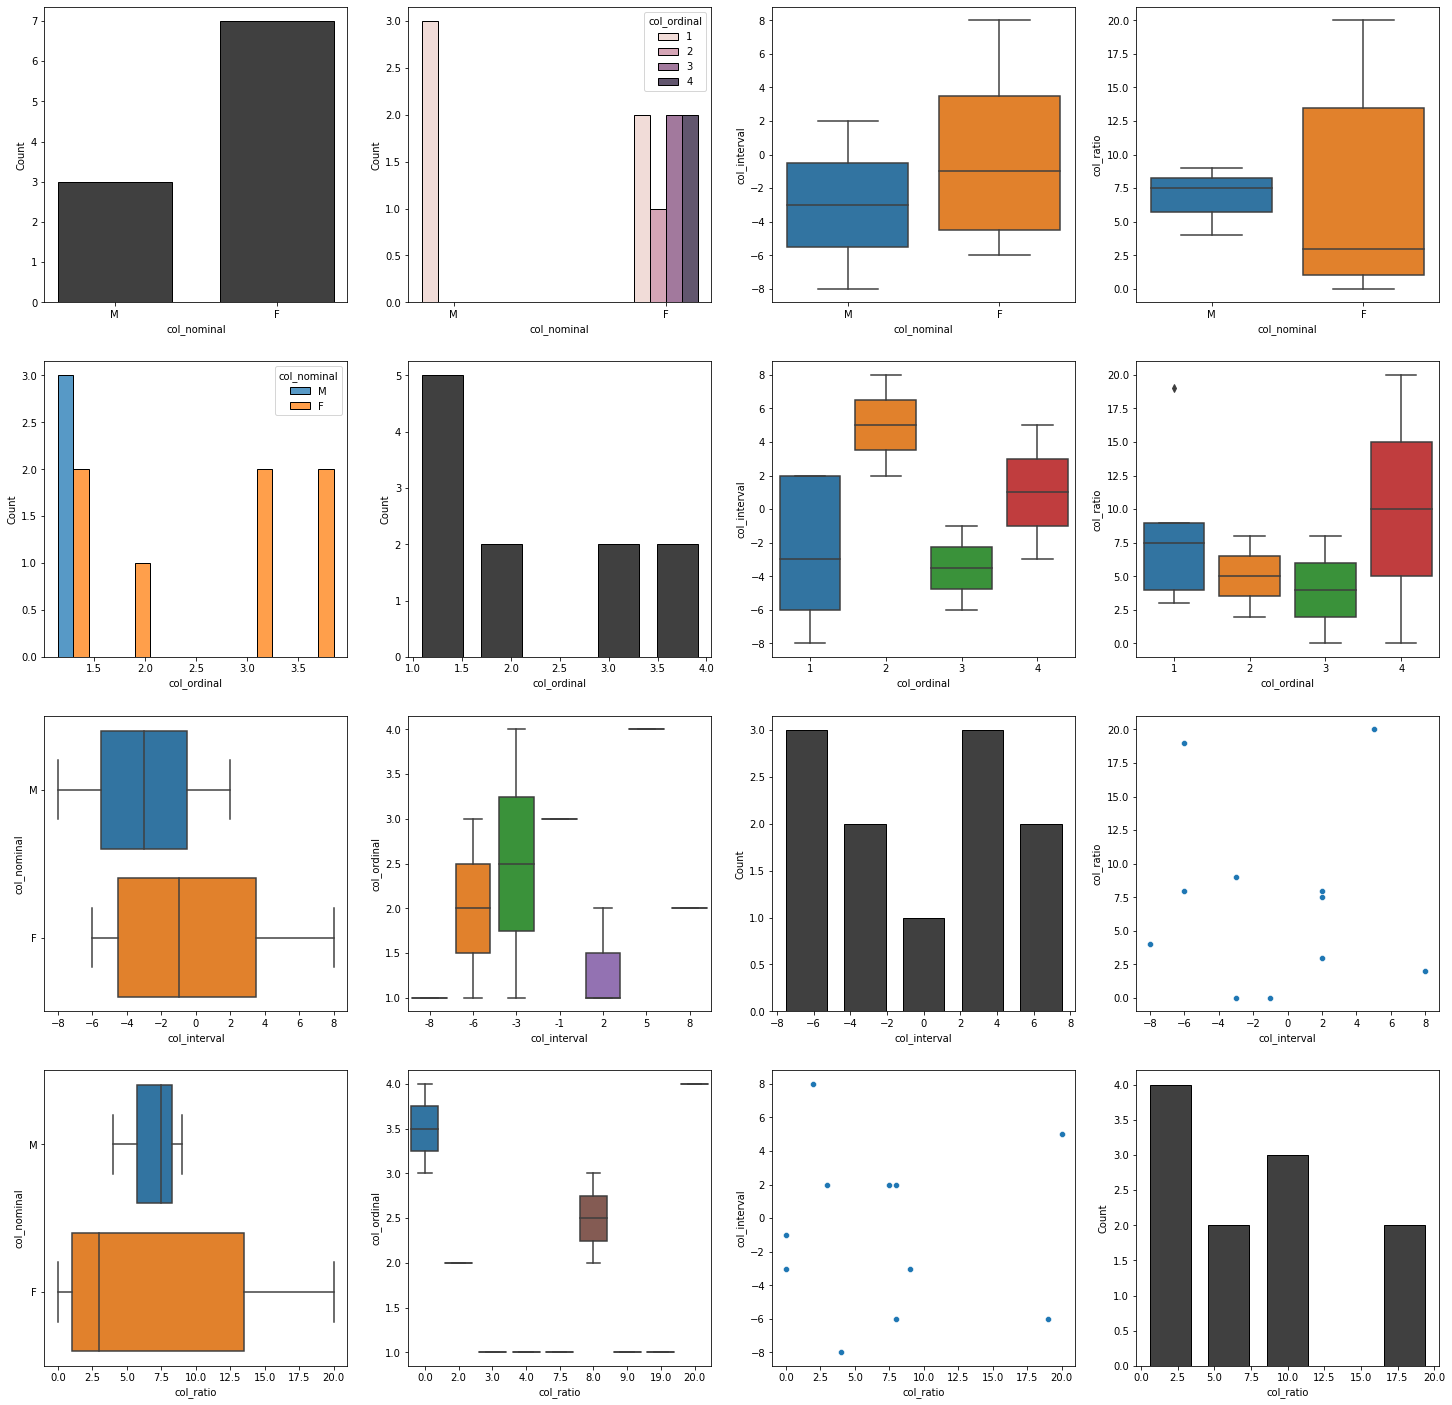

In [116]:
simpleDDA(df1)

### Example 2:

In [117]:
#series of values with a sufix as their type name
col_nominal= ['Science','Computer','Computer','Math','Computer','Math']
col_ordinal = ['biginner', 'advanced', 'advanced', 'intermediate', 'intermediate', 'intermediate']
col_interval = [1, 10, 8, 5,4,8]
col_ratio= [4, 0, 8, 9,9.5, 9.75]

col_names= ['col_nominal','col_ordinal', 'col_interval', 'col_ratio']
#order od ordinal variables
categories = [['biginner', 'intermediate', 'advanced']]
#calling dataframe function that return sorted dataframe
df2=data_frame([col_nominal, col_ordinal, col_interval, col_ratio],col_names, categories)

,col_nominal,col_ordinal,col_interval,col_ratio
0,Science,biginner,1,4.00
3,Math,intermediate,5,9.00
4,Computer,intermediate,4,9.50
5,Math,intermediate,8,9.75
1,Computer,advanced,10,0.00
2,Computer,advanced,8,8.00




A: 


,col_nominal,col_ordinal,col_interval,col_ratio
observation,6,6,6,6
entery,4,4,4,4
null_enteries,0,0,0,0
unique_entreies,3,3,5,6




B1: 


,col_nominal,col_ordinal,col_interval,col_ratio
mode,Computer,intermediate,8.0,0.000000
median,None,2.0,6.5,8.500000
mean,None,None,6.0,6.708333




B2: 


,col_nominal,col_ordinal,col_interval,col_ratio
Unique,3.0,NaN,NaN,NaN
Min,NaN,1.0,1.000000,0.000000
Max,NaN,3.0,10.000000,9.750000
IQR,NaN,NaN,3.750000,4.375000
Std,NaN,NaN,3.286335,3.906458




C: 


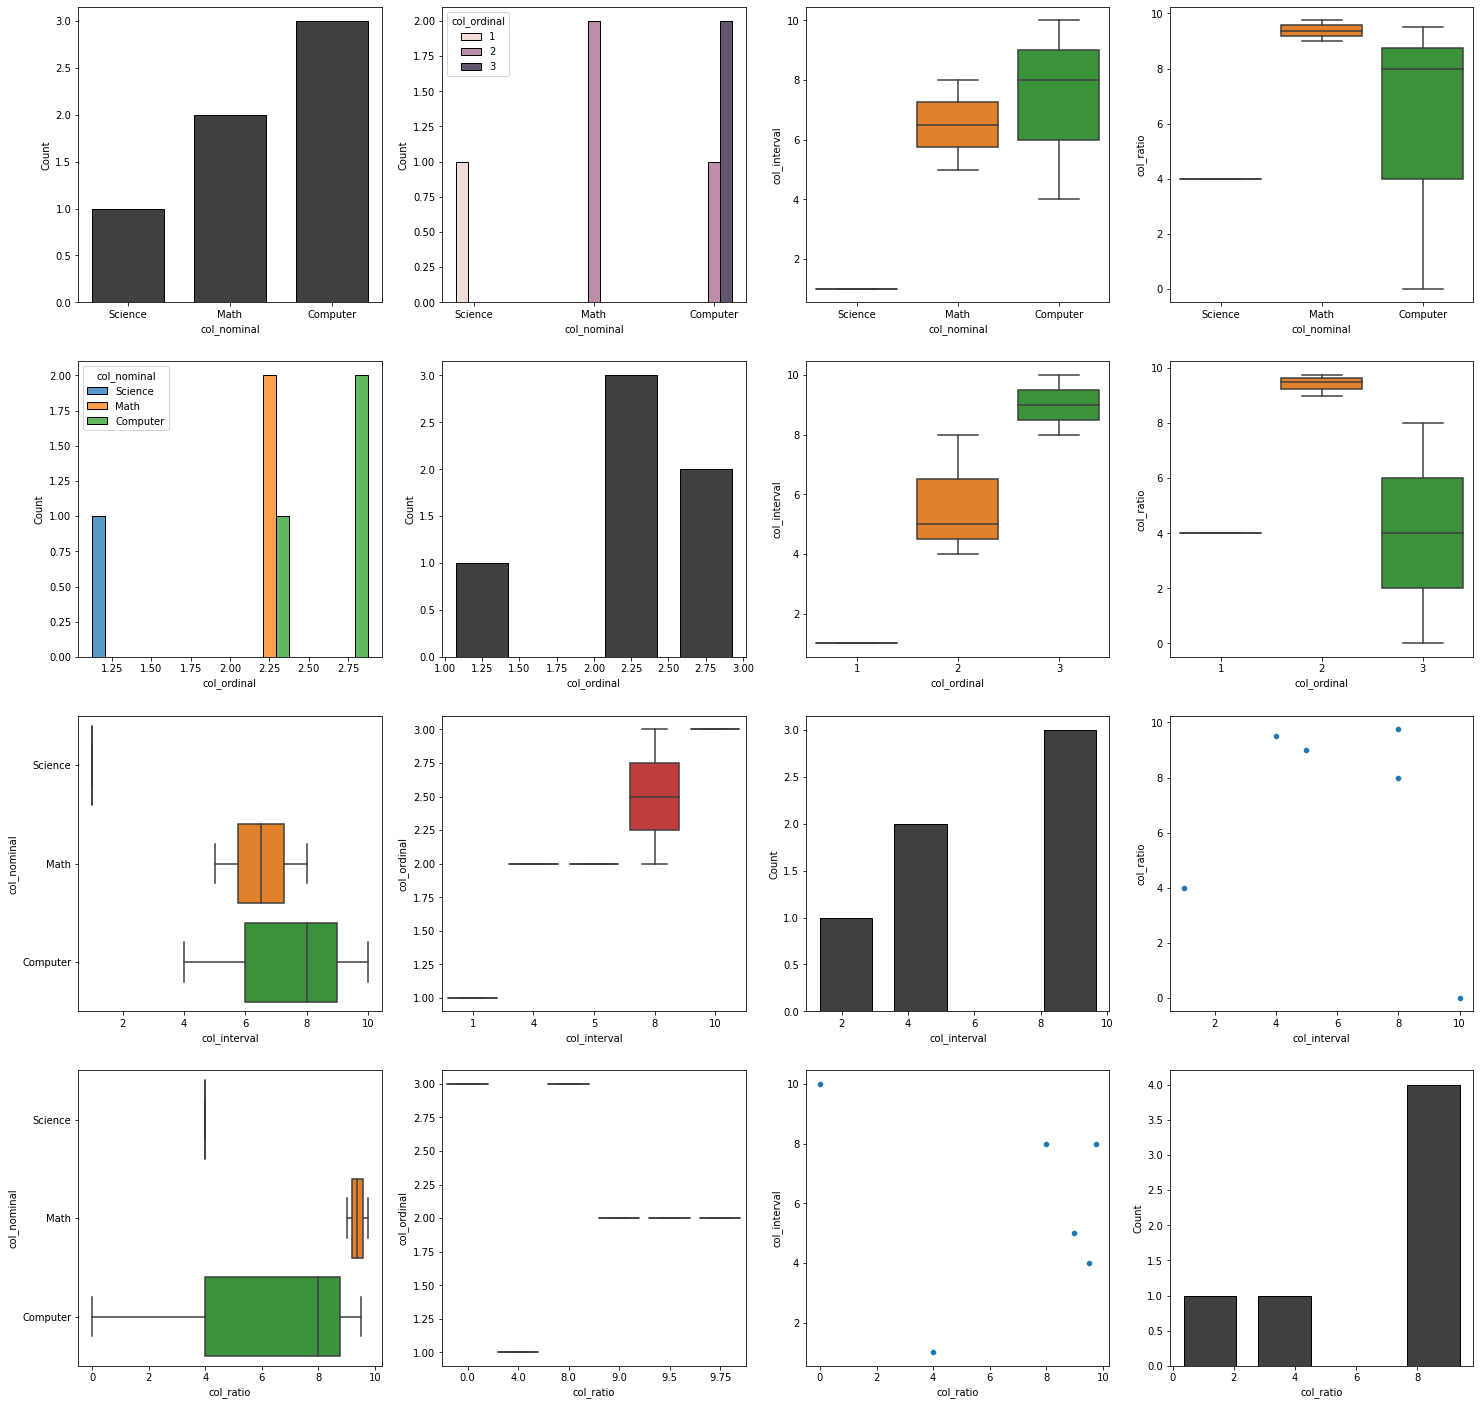

In [118]:
simpleDDA(df2)

### Example 3:

In [119]:
col_nominal = ['French','English','Spanish','French','French','French','English']
col_ordinal = ['A+', 'A', 'A', 'D', 'C-', 'B+','B']
col_interval = [11, 3, 13, 6, 18, 1, 3]
col_ratio = [400, 400, 800, 900,900, 400,700]

col_names= ['col_nominal','col_ordinal', 'col_interval', 'col_ratio']

#defining the list of categori
categories = [['A+','A','A-','B+','B','B-','C+','C','C-','F']]

#calling dataframe function
df3=data_frame([col_nominal, col_ordinal, col_interval, col_ratio],col_names, categories)

,col_nominal,col_ordinal,col_interval,col_ratio
0,French,A+,11,400
1,English,A,3,400
2,Spanish,A,13,800
5,French,B+,1,400
6,English,B,3,700
4,French,C-,18,900
3,French,NaN,6,900




A: 


,col_nominal,col_ordinal,col_interval,col_ratio
observation,7,7,7,7
entery,4,4,4,4
null_enteries,0,1,0,0
unique_entreies,3,6,6,4




B1: 


,col_nominal,col_ordinal,col_interval,col_ratio
mode,French,A,3.000000,400.000000
median,None,3.0,6.000000,700.000000
mean,None,None,7.857143,642.857143




B2: 


,col_nominal,col_ordinal,col_interval,col_ratio
Unique,3.0,NaN,NaN,NaN
Min,NaN,1.0,1.000000,400.000000
Max,NaN,6.0,18.000000,900.000000
IQR,NaN,NaN,9.000000,450.000000
Std,NaN,NaN,6.283008,237.045304




C: 


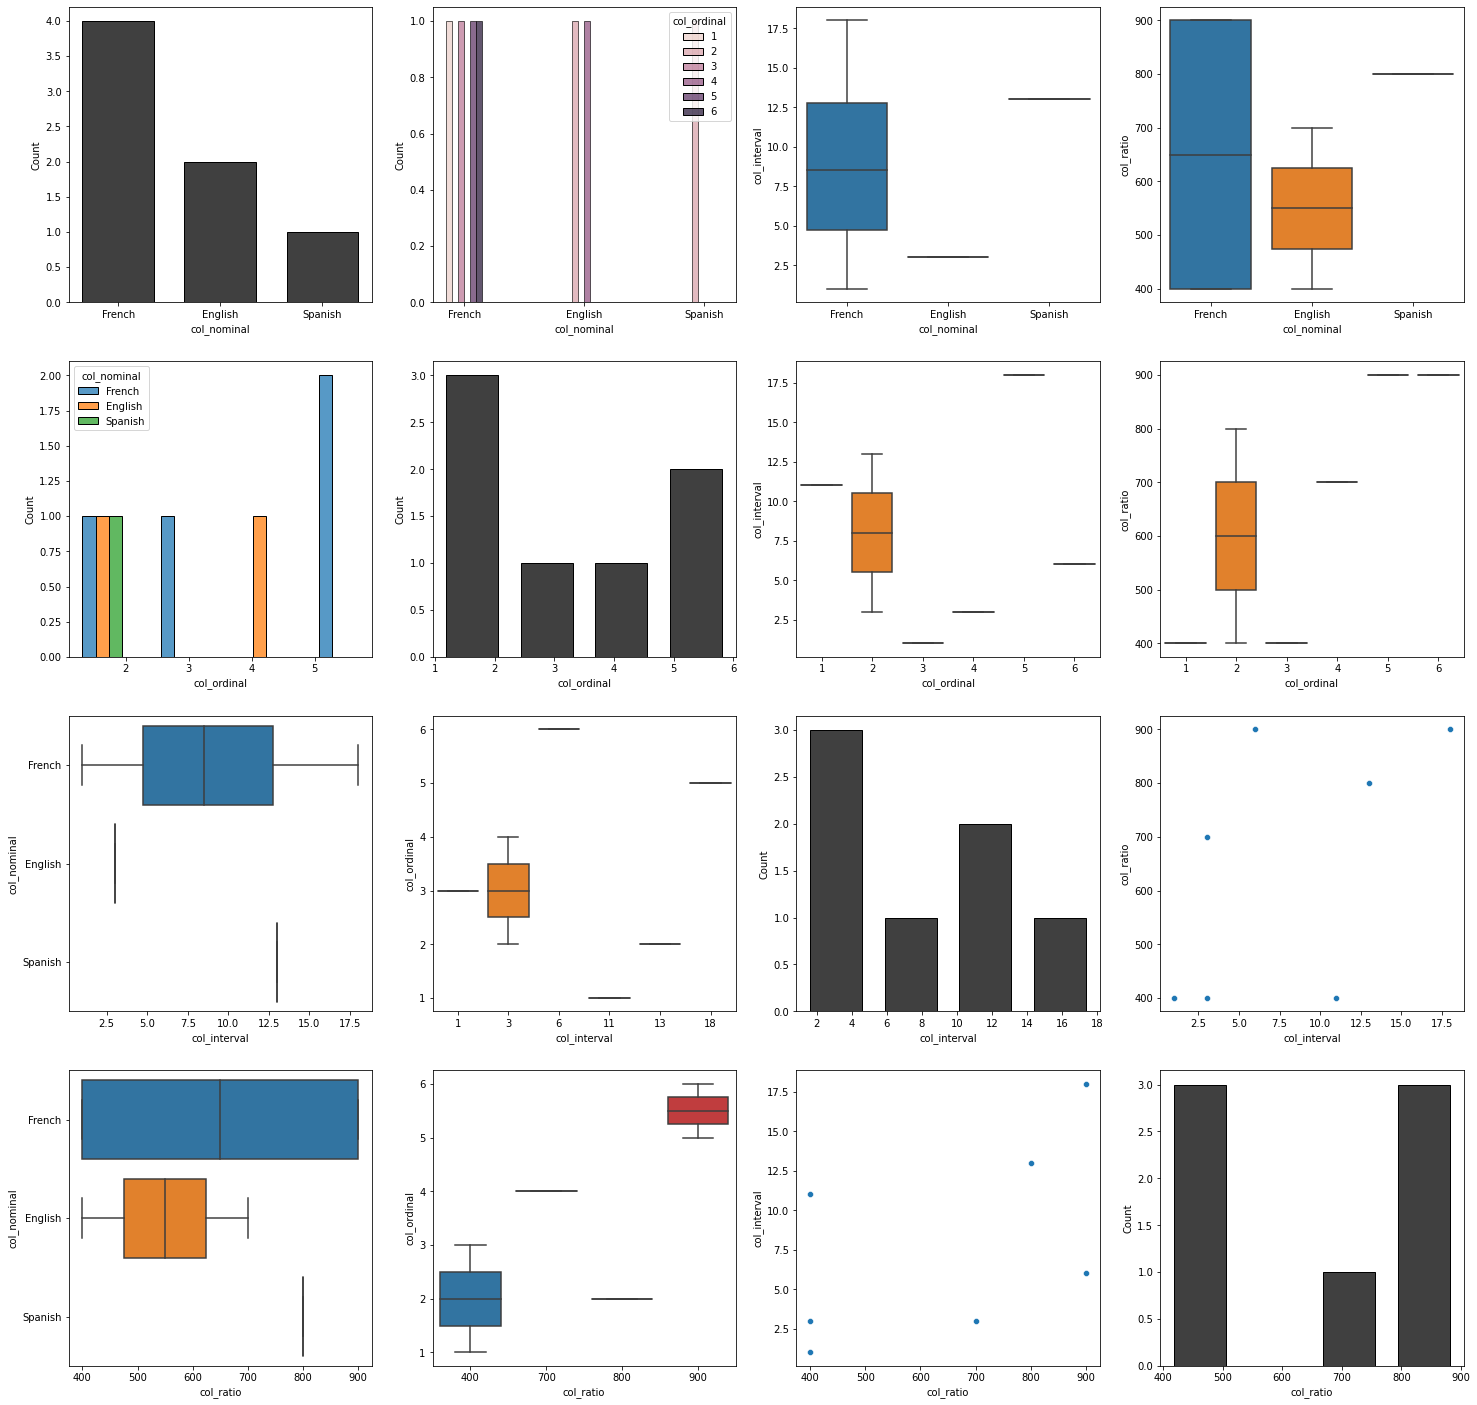

In [120]:
simpleDDA(df3)